In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.csv' with the path to your actual CSV file
file_path = 'healthcare-dataset-stroke-data (1).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Preview the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [75]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.7935420743639922



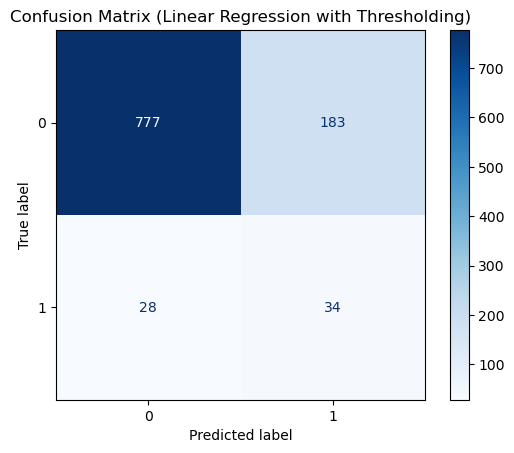

In [77]:
# Select two attributes for analysis
selected_attributes = ['avg_glucose_level', 'hypertension', 'stroke']
selected_df = df[selected_attributes]

# Independent variables (X) and Dependent variable (y)
X = selected_df[['avg_glucose_level', 'hypertension']]
y = selected_df['stroke']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Convert predictions to binary format(Convert to 0 or 1)
y_pred_int = np.where(y_pred >= np.mean(y_test), 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_int)
print('Accuracy:', accuracy)
print()

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred_int)
display_con = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=[0, 1])
display_con.plot(cmap='Blues')
plt.title("Confusion Matrix (Linear Regression with Thresholding)")
plt.show()

C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


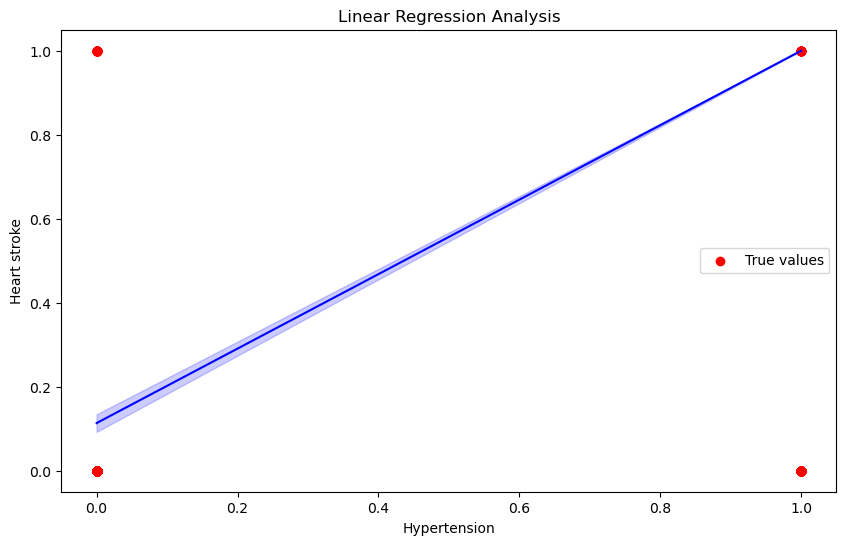

Slope (a): 0.00
Intercept (b): -0.01


In [78]:
# Get the coefficients
a = model.coef_[0]
b = model.intercept_

# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['hypertension'], y_test, color='red', label='True values')
sns.lineplot(x=X_test['hypertension'], y=y_pred_int, color='b')
plt.xlabel('Hypertension')
plt.ylabel('Heart stroke')

plt.legend()
plt.title('Linear Regression Analysis')
plt.show()

# Print the coefficients (slope 'a' and intercept 'b')
print(f'Slope (a): {a:.2f}')
print(f'Intercept (b): {b:.2f}')

In [79]:
selected_features_dt = ['age', 'avg_glucose_level', 'bmi']
target_column_dt = 'stroke'

In [80]:
dt_df = df[selected_features_dt + [target_column_dt]].copy()
missing_values_dt = dt_df.isnull().sum()
print("Missing values in the selected dataset:")
print(missing_values_dt)
mean_bmi_dt = dt_df['bmi'].mean()
dt_df['bmi'].fillna(mean_bmi_dt, inplace=True)
missing_values_after_fill = dt_df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after_fill)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
X_dt = dt_df[selected_features_dt]
y_dt = dt_df[target_column_dt]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)
accuracy_dt = dt_model.score(X_test_dt, y_test_dt)
print(f"\nAccuracy of the Decision Tree: {accuracy_dt:.2f}")

Missing values in the selected dataset:
age                    0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

Missing values after filling:
age                  0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

Accuracy of the Decision Tree: 0.89


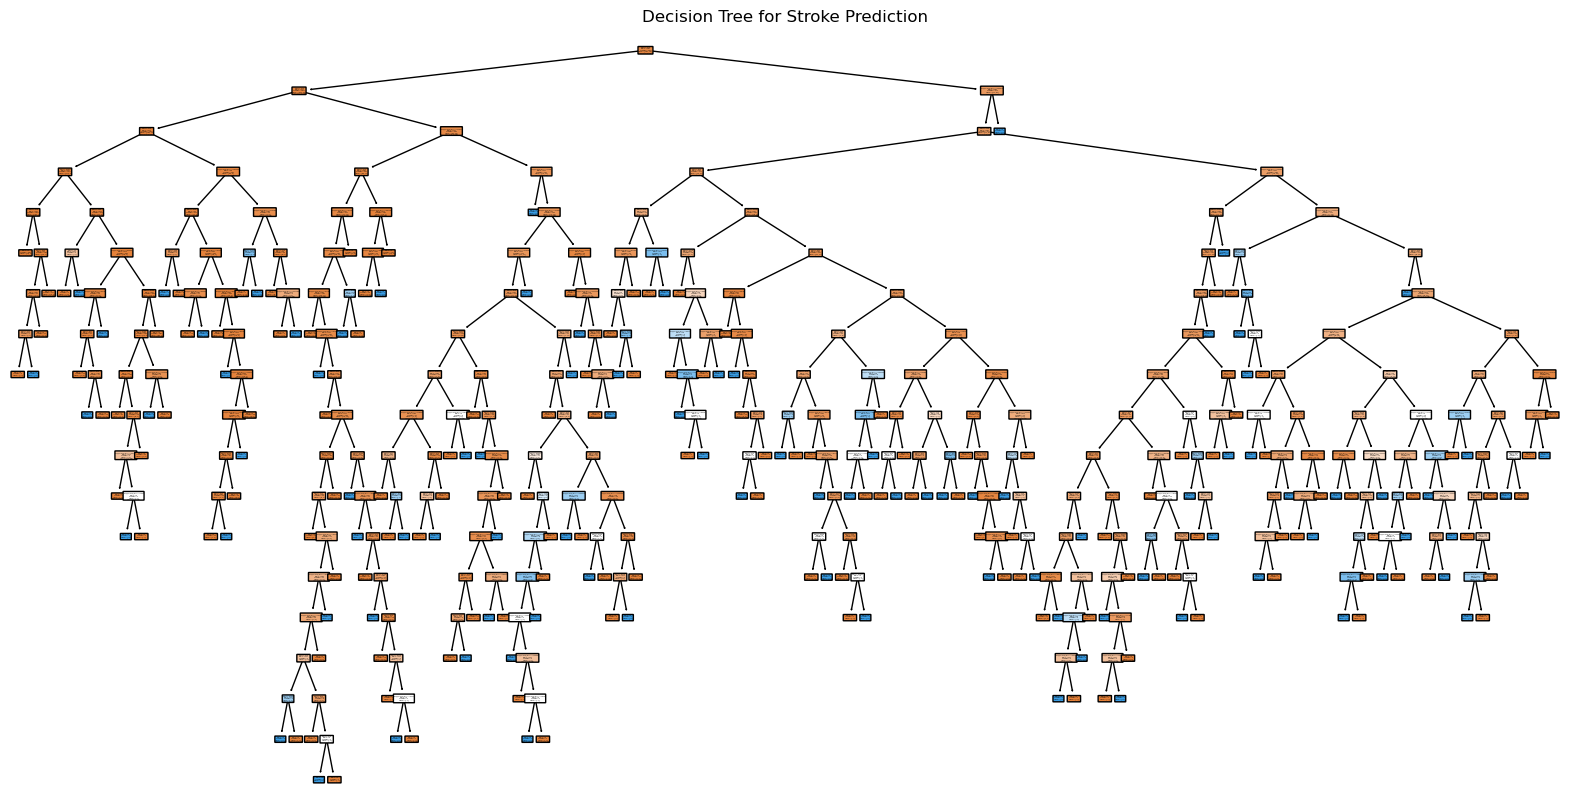

In [81]:
plt.figure(figsize=(20,10 ))
plot_tree(dt_model, feature_names=selected_features_dt, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.title("Decision Tree for Stroke Prediction")
plt.show()

In [82]:
from sklearn.tree import export_text 
tree_rules = export_text(dt_model, feature_names=selected_features_dt)
print(tree_rules)

|--- age <= 67.50
|   |--- age <= 53.50
|   |   |--- age <= 47.50
|   |   |   |--- bmi <= 28.85
|   |   |   |   |--- age <= 37.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  37.50
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- bmi <= 24.10
|   |   |   |   |   |   |   |--- bmi <= 23.30
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  23.30
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- bmi >  24.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- bmi >  28.85
|   |   |   |   |--- age <= 1.56
|   |   |   |   |   |--- age <= 1.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  1.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  1.56
|   |   |   |   |   |--- avg_glucose_level <= 64.56
|   |   |   |   |   |   |--- avg_glucose_level <= 64.02
|   |   |   |   |   |   

C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.93


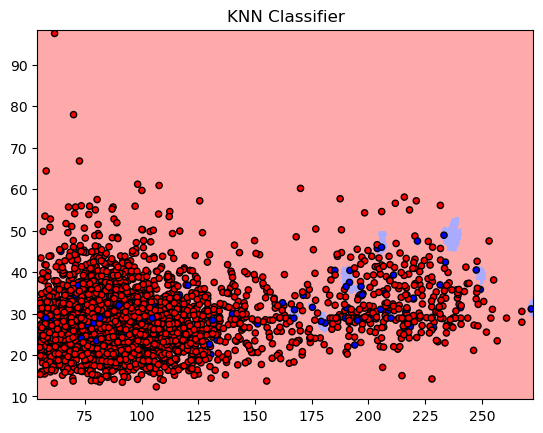

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
h=0.2

# Assuming dt_df is a pre-defined DataFrame with the necessary columns.
X_knn = dt_df[['avg_glucose_level', 'bmi']]
y_knn = dt_df['stroke']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.4, random_state=42)

# Define and fit the model on the training data.
clf = KNeighborsClassifier(4, weights='distance')
clf.fit(X_train, y_train)

# Create a mesh grid.
x_min, x_max = X_knn.iloc[:, 0].min() - 1, X_knn.iloc[:, 0].max() + 1
y_min, y_max = X_knn.iloc[:, 1].min() - 1, X_knn.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps.
map_L = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
map_D = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries.
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=map_L)

# Plot the actual data points.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=map_D, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN Classifier')

# Evaluate and print the accuracy on the test set.
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.show()

In [84]:
# Evaluate and print training accuracy.
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate and print test accuracy.
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Show the plot.
plt.show()

Training Accuracy: 1.00
Test Accuracy: 0.93


C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


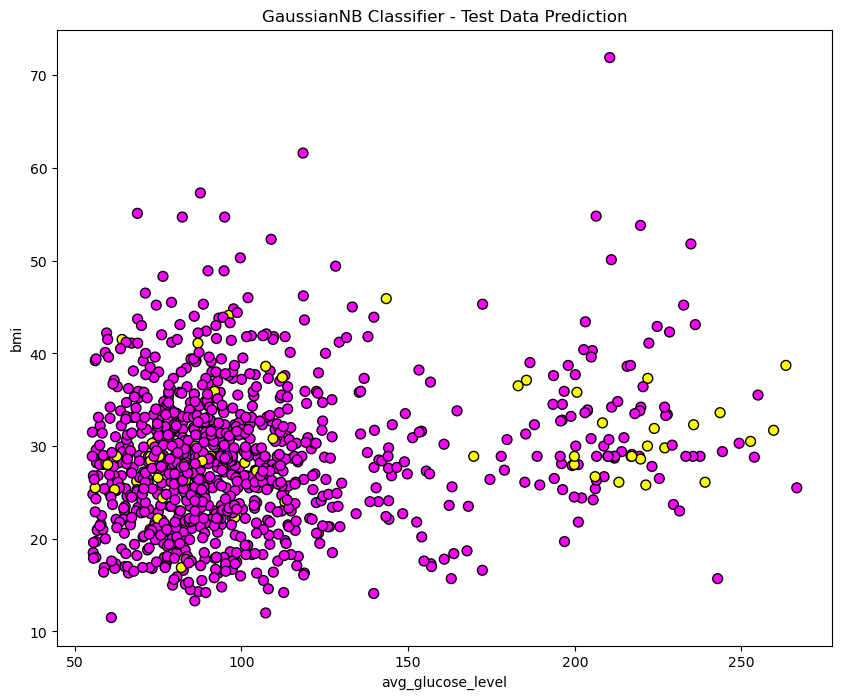

In [85]:
from sklearn.naive_bayes import GaussianNB

X_nb = dt_df[['avg_glucose_level', 'bmi']]
y_nb = dt_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# Apply GaussianNB to predict test data
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Make the graph for GaussianNB
plt.figure(figsize=(10, 8))
plt.scatter(X_test['avg_glucose_level'], X_test['bmi'], c=y_test, cmap='spring', edgecolor='k', s=50)
plt.title('GaussianNB Classifier - Test Data Prediction')
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')

# Plot decision boundaries
Z_gnb = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gnb = Z_gnb.reshape(xx.shape)

In [86]:
# Predictions on training and testing data
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculate accuracies using accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9496
Testing Accuracy: 0.9384


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Drop rows with missing values in the 'age' and 'bmi' columns
df = df.dropna(subset=['age', 'bmi'])

# Define features (X) and target variable (y)
X = df[['age', 'bmi']]
y = df['stroke']

# Select a subset of the data for training and testing
x = X.iloc[:1500, :]
y = y.iloc[:1500]

# Define, fit, predict, and find the accuracy of models

# Linear kernel SVM
svc = svm.SVC(kernel='linear', C=1).fit(x, y)
svc_pred = svc.predict(x)
print('SVC accuracy:', accuracy_score(y, svc_pred) * 100)

# Linear SVC (another linear kernel implementation)
lin_svc = svm.LinearSVC(C=1, max_iter=10000).fit(x, y)
lsvc_pred = lin_svc.predict(x)
print('Linear SVC accuracy:', accuracy_score(y, lsvc_pred) * 100)

# RBF kernel SVM
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(x, y)
rsvc_pred = rbf_svc.predict(x)
print('RBF accuracy:', accuracy_score(y, rsvc_pred) * 100)

# Polynomial kernel SVM (degree 3)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1).fit(x, y)
psvc_pred = poly_svc.predict(x)
print('Polynomial accuracy:', accuracy_score(y, psvc_pred) * 100)

SVC accuracy: 86.06666666666666


C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC accuracy: 86.06666666666666
RBF accuracy: 89.73333333333333
Polynomial accuracy: 86.06666666666666


C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tdivy\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


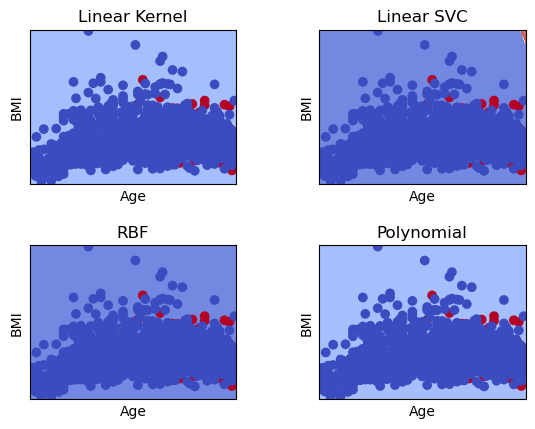

In [88]:
# Plot decision boundaries for each classifier
h = 0.5  # Step size in the mesh
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1  # age over x-axis
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1  # bmi over y-axis
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['Linear Kernel', 'Linear SVC', 'RBF', 'Polynomial']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Create 4 subplots
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Predict based on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    # Labels and title for the plot
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Based on the accuracy scores:

RBF Kernel SVM has the highest accuracy at 89.73%.
SVC (Linear Kernel) at 85.06%, Linear SVC and Polynomial Kernel  have an accuracy of 86.07%.
Therefore, the RBF kernel SVM model is the most accurate among the four models tested. This suggests that the RBF kernel is able to capture some non-linear patterns in the data that the other models may have missed.

C:\Users\tdivy\AppData\Local\Temp\ipykernel_19544\2291925257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df_rf['bmi'].fillna(mean_bmi_rf, inplace=True)


Accuracy using Random Forest: 0.95


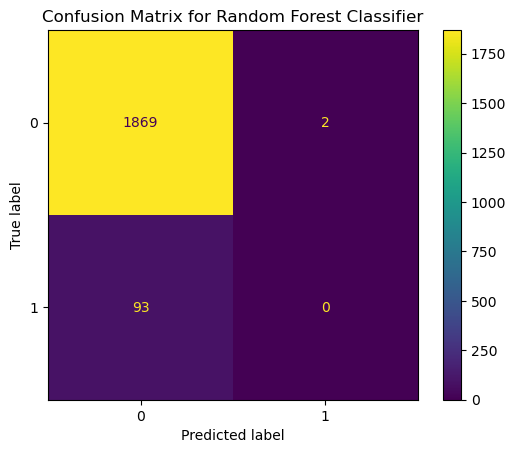

In [89]:
# Step 6: Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select two numeric attributes
selected_attributes_rf = ['avg_glucose_level', 'bmi', 'stroke']
selected_df_rf = df[selected_attributes_rf]

# Handling missing values
mean_bmi_rf = selected_df_rf['bmi'].mean()
selected_df_rf['bmi'].fillna(mean_bmi_rf, inplace=True)

# Split the data
X_rf = selected_df_rf[['avg_glucose_level', 'bmi']]
y_rf = selected_df_rf['stroke']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy using Random Forest: {accuracy_rf:.2f}")

# Display confusion matrix
confusion_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
disply_con_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[0, 1])
disply_con_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [90]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# load iris data

X=df[['age','avg_glucose_level']]
y=df["stroke"]

# split data to tran and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3 )
# define the model, fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=50)
y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
CM=confusion_matrix(y_pred,y_test)
print(CM)
AS=accuracy_score(y_pred,y_test)
print(AS)
CR=classification_report(y_pred,y_test)
print(CR)

[[1384   64]
 [  18    7]]
0.9443312966734555
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1448
           1       0.10      0.28      0.15        25

    accuracy                           0.94      1473
   macro avg       0.54      0.62      0.56      1473
weighted avg       0.97      0.94      0.96      1473



In [91]:
from sklearn.tree import export_graphviz
import graphviz
rf=RandomForestClassifier(n_estimators=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

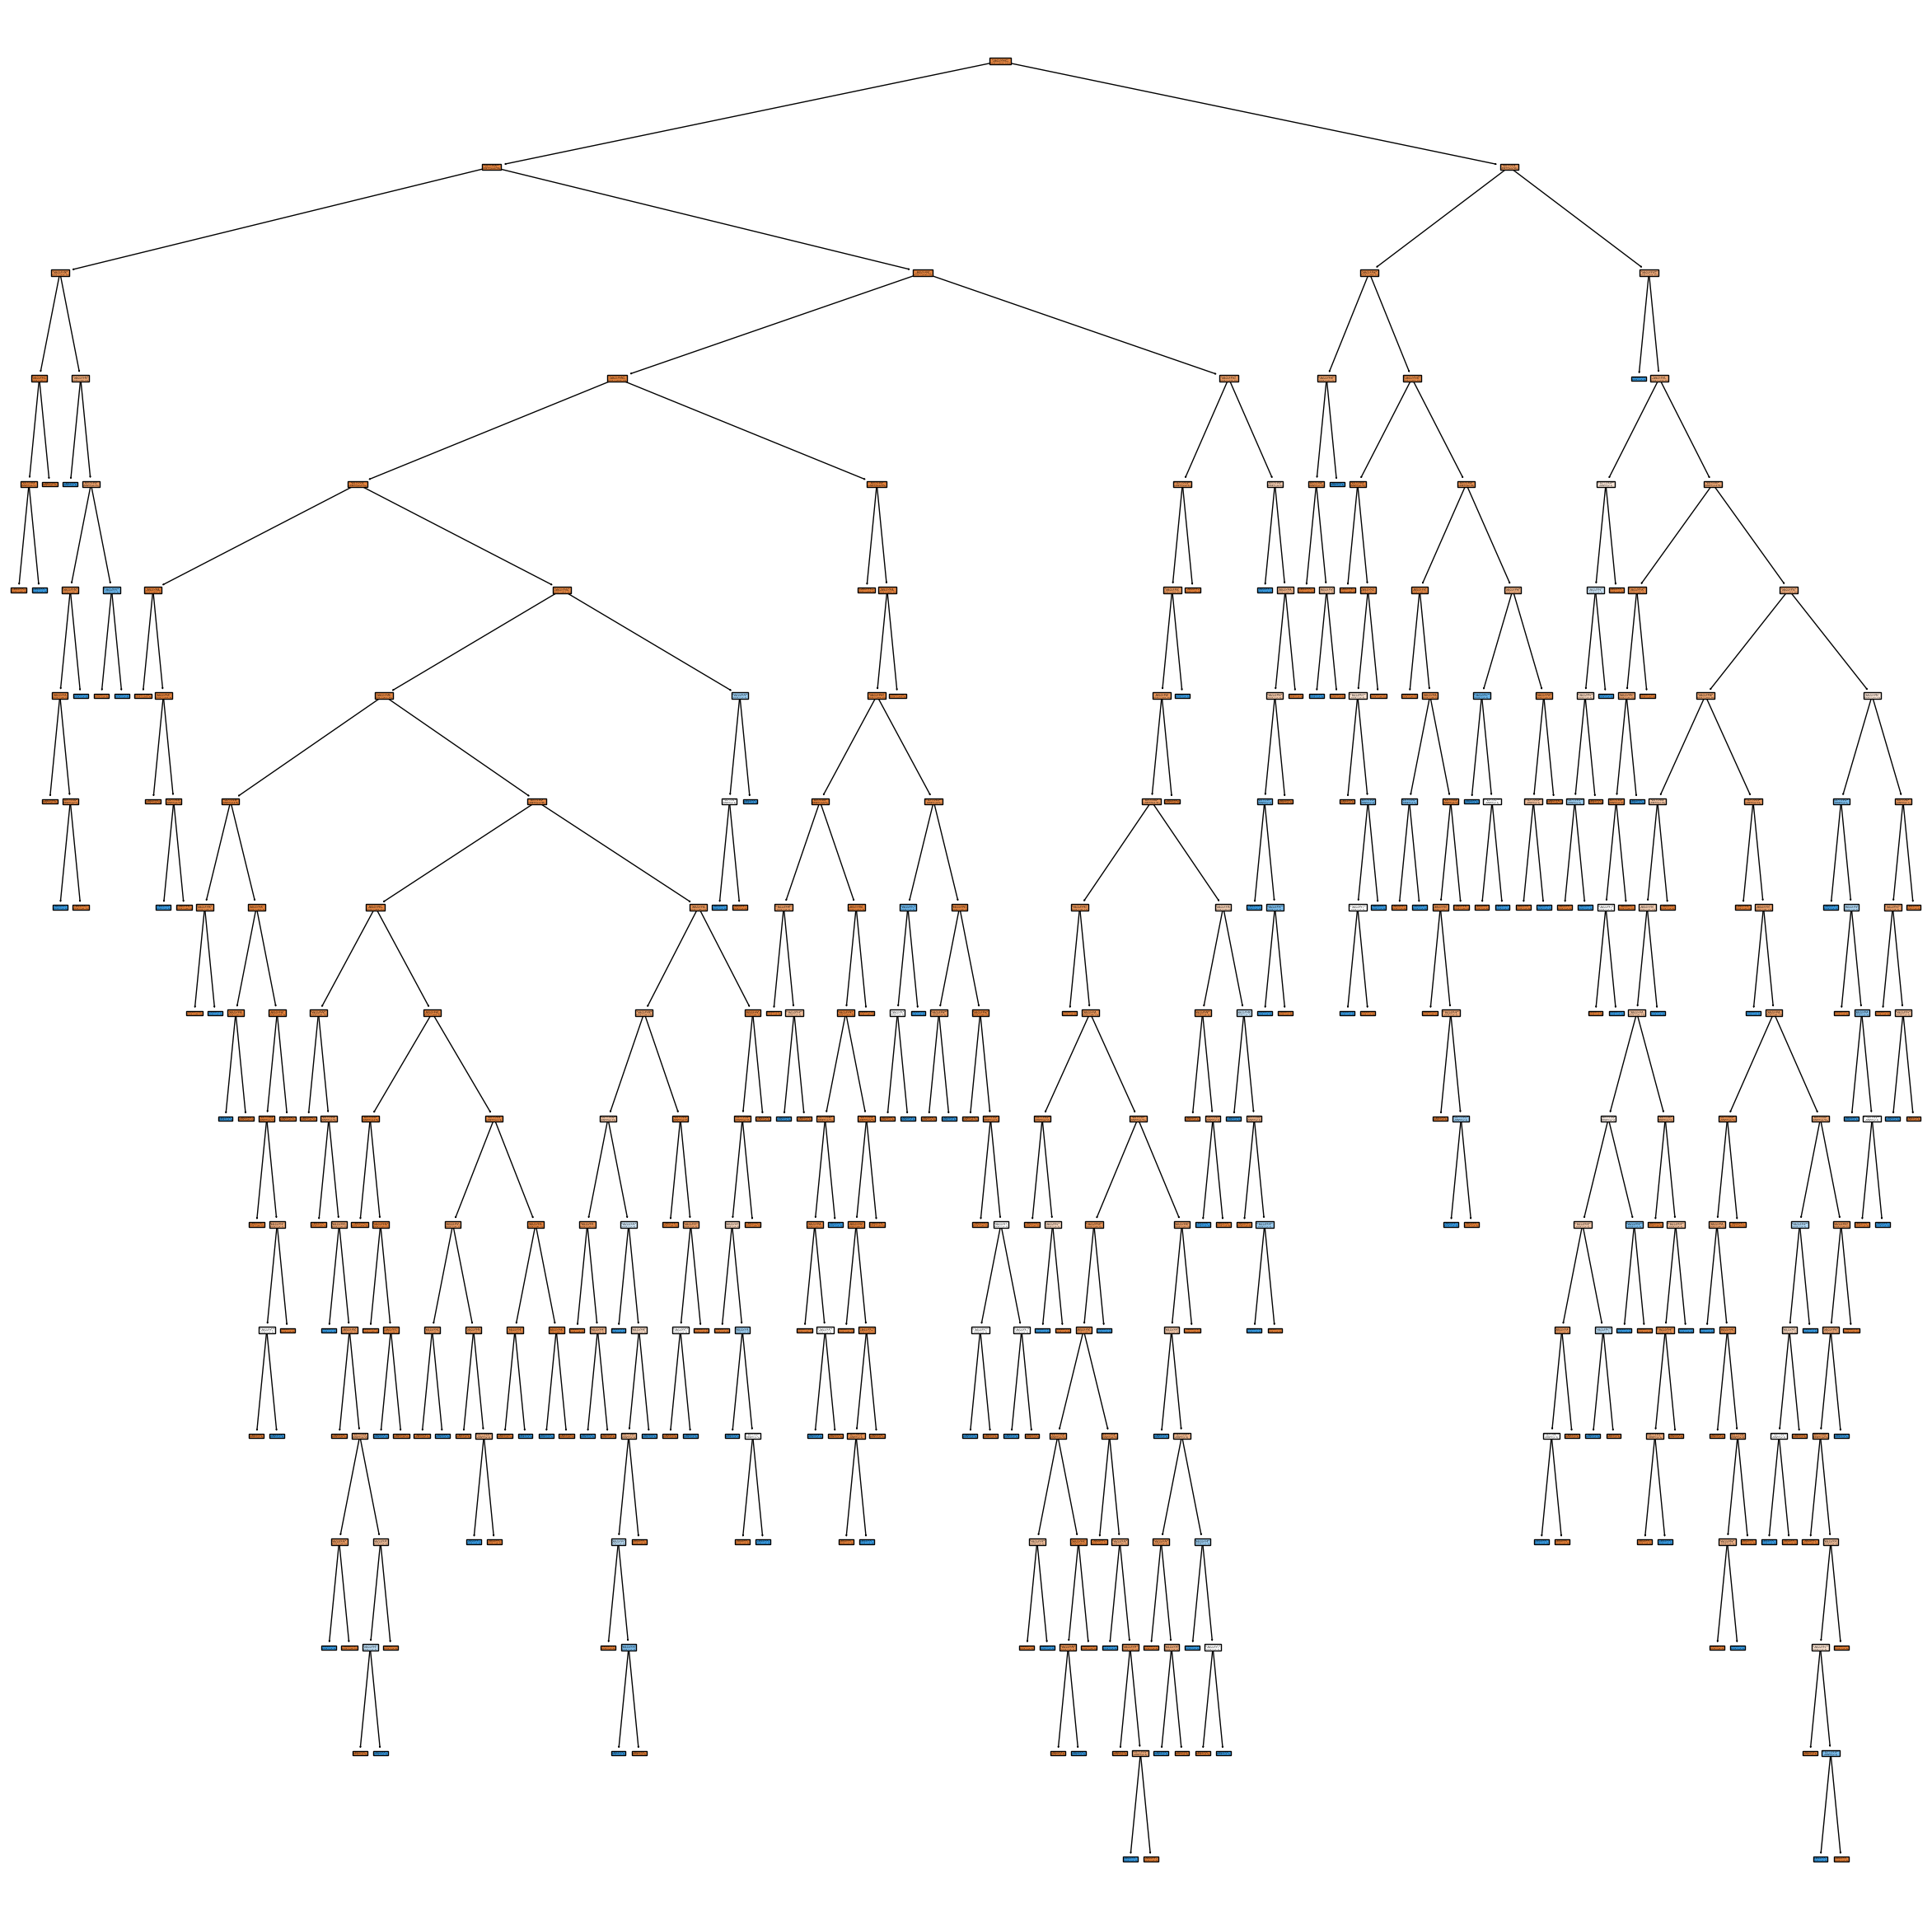

In [92]:
from sklearn import tree
plt.figure(figsize=(30,30))
_=tree.plot_tree(rf.estimators_[0], filled=True)

In [114]:
#Cut some rows to make tree more readable
X=X.iloc[0:500,:]
y=y.iloc[0:500]


In [115]:
# split data to tran and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3 )
# define the model, fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=50)
y_pred=clf.predict(X_test)

In [116]:
from sklearn.tree import export_graphviz
import graphviz

rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

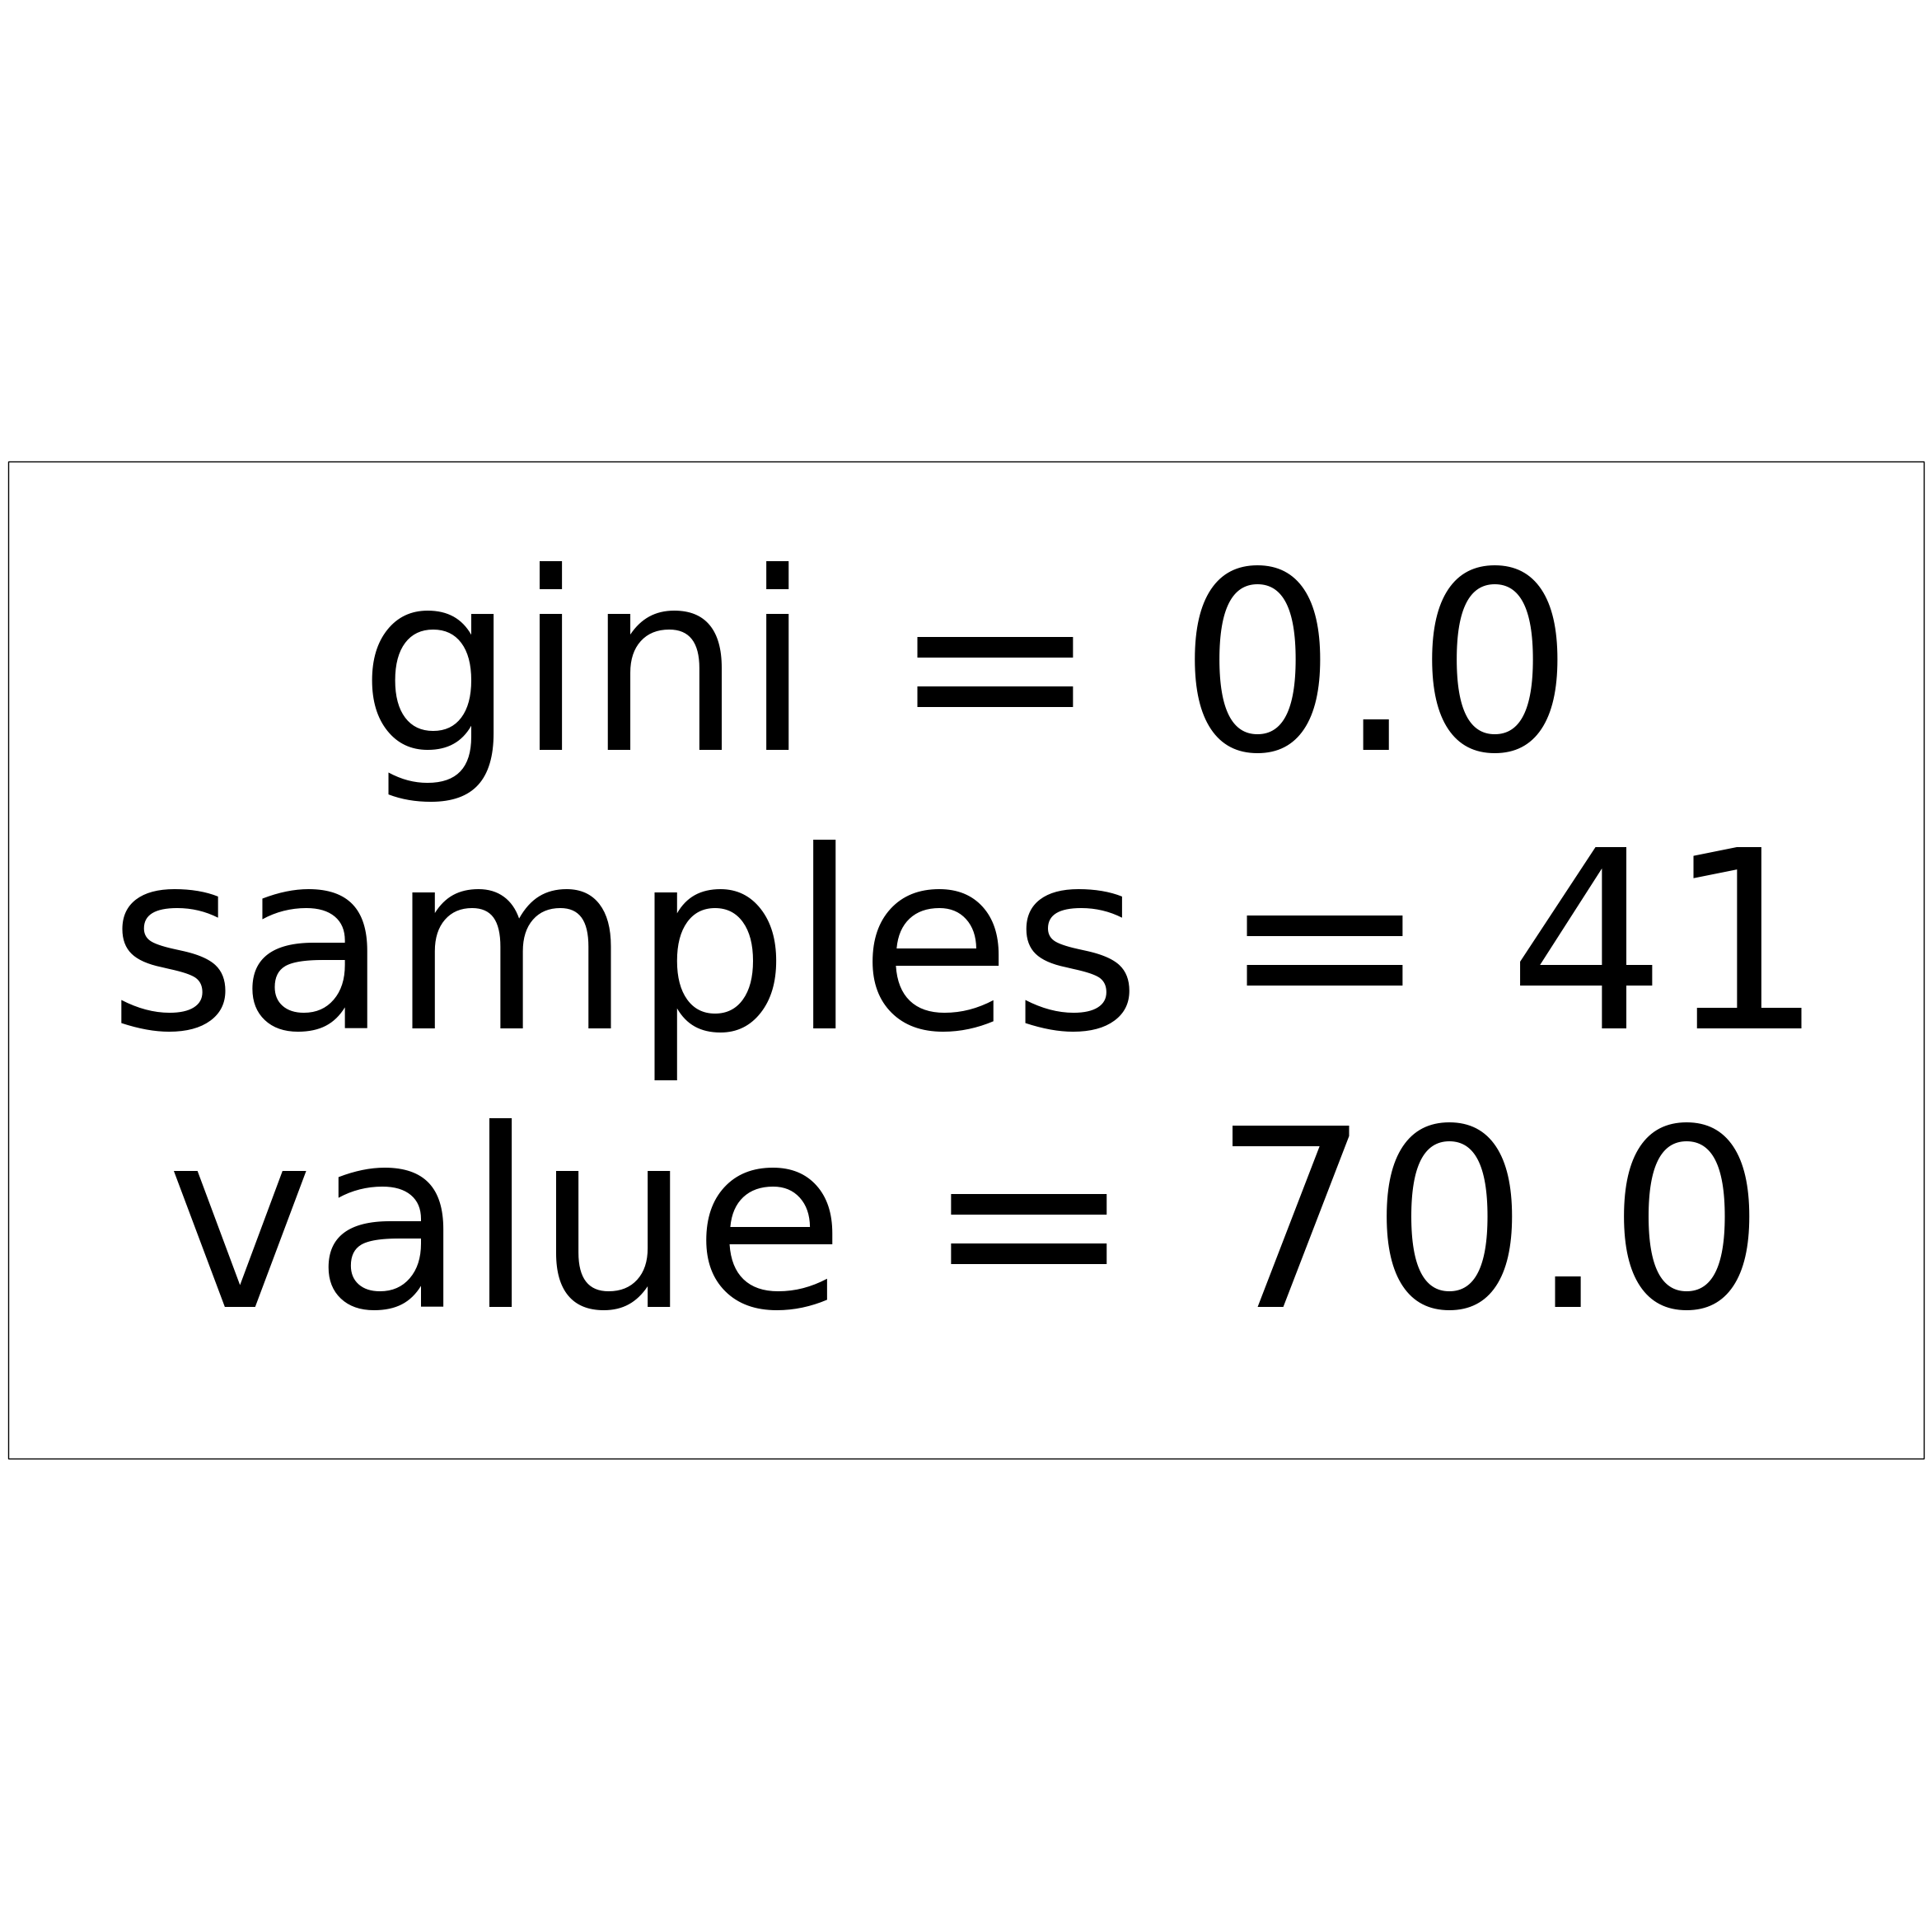

In [117]:
from sklearn import tree
plt.figure(figsize=(30,30))
_=tree.plot_tree(rf.estimators_[0], filled=True)